<a href="https://colab.research.google.com/github/JamesGilJGBS/Portifolio/blob/main/SEO/GoogleTrends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SimpreNina

SEO para loja virtual de laços, tiaras, e turbantes siemprenina.com.br
Análise do Google Trends de palavras chaves e ocorrências geográficas.

In [1]:
#!pip install pytrends
#!pip install pyodbc

In [2]:
import pandas as pd
import numpy as np
import datetime
from datetime import timezone, datetime, timedelta, date
import seaborn as sns
sns.set()

import requests
import pyodbc
import hashlib
from pytrends.request import TrendReq
pytrends = TrendReq(hl='pt-BR', tz=360)

import json

In [15]:
# Get Google Hot Trends data
print('Tendências do Dia: Hot Trends')
today_searches_df = pytrends.today_searches(pn='BR')
print(today_searches_df)

Tendências do Dia: Hot Trends
0                  Umuarama Futsal
1                      Gossip Girl
2    Agendamento vacina Vila Velha
3                        Megan Fox
4              Francieli Fantinato
5                  Elize Matsunaga
6                  Rodrigo Pacheco
7                   Forças Armadas
8                       Bossa Nova
Name: query, dtype: object


In [16]:
termo = 'laço'

In [26]:
# build the payload
pytrends.build_payload(kw_list=[termo], timeframe='2020-01-01 2021-07-30', geo='BR') 

# get related queries
df_rq = pytrends.related_queries()

print('Assuntos Pesquisados de', termo)

# display df_rq
print(df_rq)

Assuntos Pesquisados de laço
{'laço': {'top':                             query  value
0                      fazer laço    100
1                 como fazer laço     89
2                    laço de fita     78
3                  menina de laço     33
4                    laço de amor     32
5                  laço de cabelo     30
6                       laço rosa     28
7                 um laço de amor     28
8          menina do laço de fita     25
9                           laços     25
10             fazer laço de fita     24
11        como fazer laço de fita     22
12  menina bonita do laço de fita     22
13                           laco     21
14                 fita para laço     20
15                  laço infantil     19
16                     molde laço     19
17                  laço de cetim     18
18                       laço png     15
19                  laço boutique     14
20                  prova do laço     13
21             como fazer um laço     13
22         

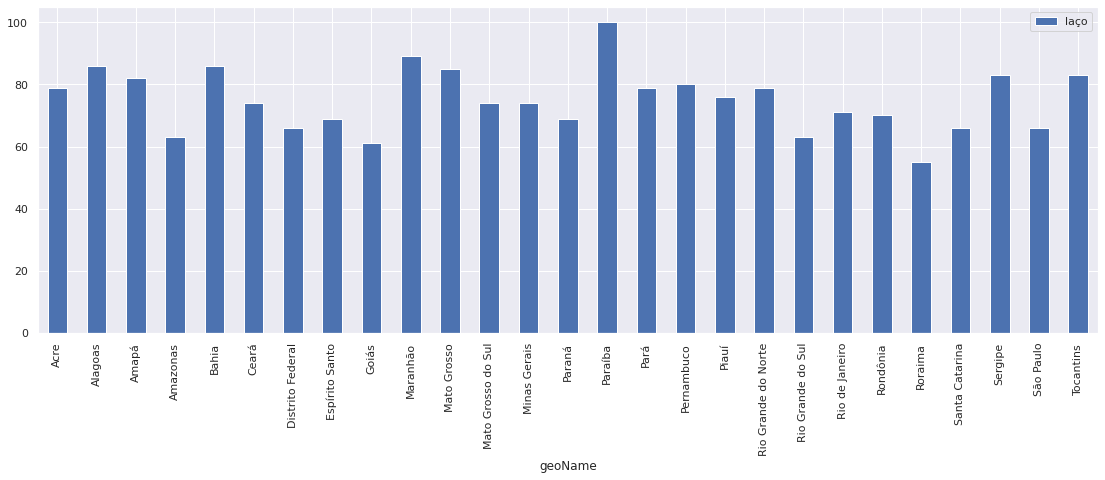

In [21]:
df = pytrends.interest_by_region()
df.head(26)
df.reset_index().plot(x = 'geoName', y = termo, figsize = (19, 6), kind = 'bar')

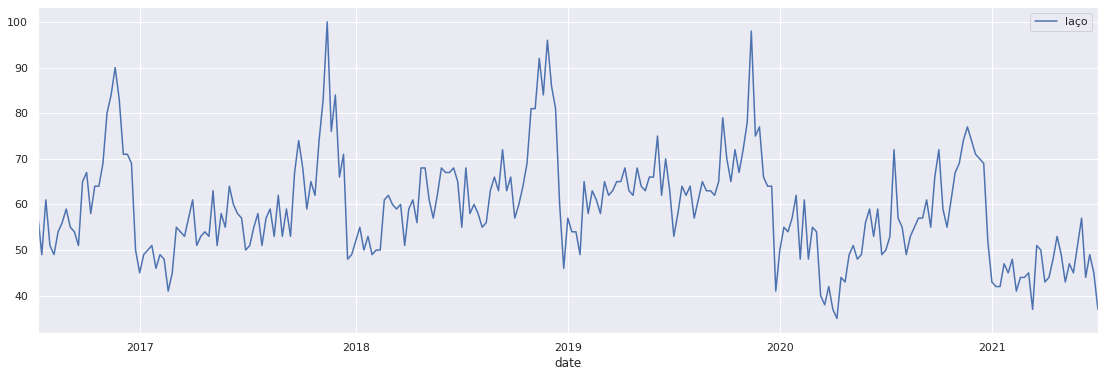

In [23]:
# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() &amp; related_queries()
pytrends.build_payload(kw_list=[termo])
 
# Interest Over Time
interest_over_time_df = pytrends.interest_over_time()
interest_over_time_df[interest_over_time_df.index>=datetime(2016,1,1)]\
.pivot_table(values=[termo], index='date')\
.plot(kind='line', stacked=True, figsize=(19,6))

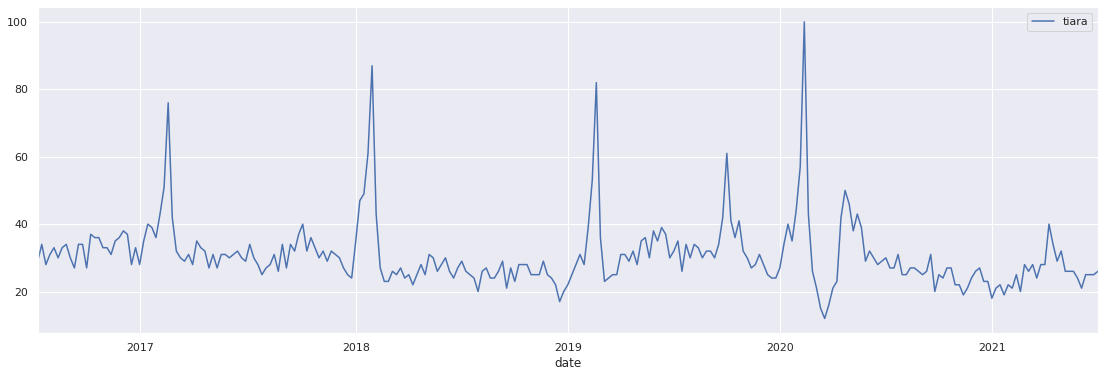

In [24]:
# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() &amp; related_queries()
pytrends.build_payload(kw_list=['tiara'])
 
# Interest Over Time
interest_over_time_df = pytrends.interest_over_time()
interest_over_time_df[interest_over_time_df.index>=datetime(2016,1,1)]\
.pivot_table(values=['tiara'], index='date')\
.plot(kind='line', stacked=True, figsize=(19,6))

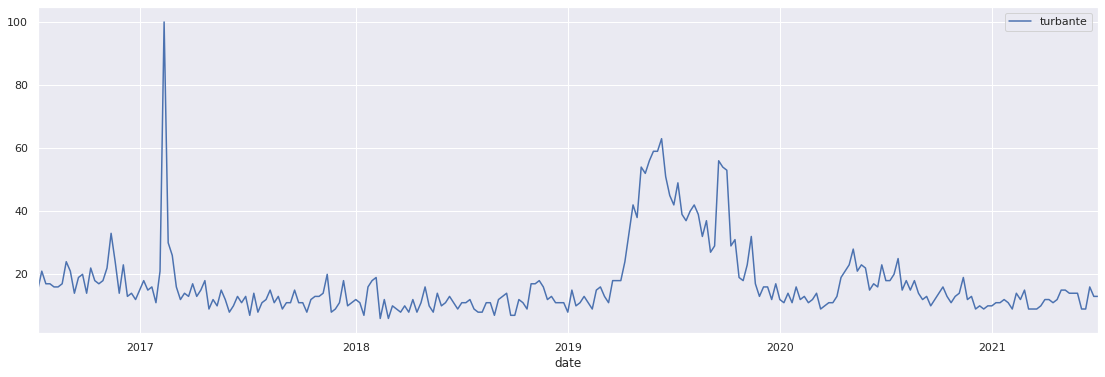

In [25]:
# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() &amp; related_queries()
pytrends.build_payload(kw_list=['turbante'])
 
# Interest Over Time
interest_over_time_df = pytrends.interest_over_time()
interest_over_time_df[interest_over_time_df.index>=datetime(2016,1,1)]\
.pivot_table(values=['turbante'], index='date')\
.plot(kind='line', stacked=True, figsize=(19,6))